# EDA Analysis and Visualization of COVID-19 Data

This exercesice aims at answering two questions by using Data about COVID-19 posted by Our World in Data website. These questions are:

1. Plot two separate charts of infected people and deaths in Spain (separately)
2. Plot Top-10 countries bar charts with number of infection cases and deaths (separately)

Data Source: https://ourworldindata.org/coronavirus-source-data

* **NOTE**: In order to provide an up to date version of data, we will be importing the data from the link provided in Our World in Data website under the European Centre for Disease Prevention and Control (ECDC) section. Following the recommendations provided in OWD website, we decided to relly on those data in order to analyse the daily global and national statistics. 

## First steps: Importing and describing Data

In [88]:
# Import the necessary libraries:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# Import dataset:

df = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv', parse_dates=["date"])
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
8997,2020-04-01,Zimbabwe,1,0,8,1
8998,2020-04-02,Zimbabwe,0,0,8,1
8999,2020-04-03,Zimbabwe,0,0,8,1
9000,2020-04-04,Zimbabwe,1,0,9,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9002 entries, 0 to 9001
Data columns (total 6 columns):
date            9002 non-null datetime64[ns]
location        9002 non-null object
new_cases       9002 non-null int64
new_deaths      9002 non-null int64
total_cases     9002 non-null int64
total_deaths    9002 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 422.1+ KB


In [91]:
df.set_index("date")

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Afghanistan,0,0,0,0
2020-01-01,Afghanistan,0,0,0,0
2020-01-02,Afghanistan,0,0,0,0
2020-01-03,Afghanistan,0,0,0,0
2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...
2020-04-01,Zimbabwe,1,0,8,1
2020-04-02,Zimbabwe,0,0,8,1
2020-04-03,Zimbabwe,0,0,8,1


### Analysing variables:

From this first step we can see that the file is a Time Series dataset containing data of the evolution of certain variables related to COVID-19 spread in different countries. After inspecting the variables, we set the column 'Date' as index. Let's examine the variables:

- **date**: Date of the observation taken, ranging from 2019/12/31 to the last day the dataset has been updated. Date formar _(yyyy-mm-dd)_.
- **location**: List of countries with available data, plus global data under the location _'World'_
- **new_cases**: amount of new cases reported on that date
- **new_deaths**: amount of new deaths reported on that date
- **total_cases**: total cases since the start of the outbreak
- **total_deaths**: total deaths since the start of the outbreak

Let's see what's going on with missing values:

## 1. Spain: Infections and Deaths


First, let's filter data related to Spain and set the column 'date' as the Index.

In [92]:
df_spain = df[df.location == "Spain"].set_index("date")
df_spain


,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Spain,0,0,0,0
2020-01-01,Spain,0,0,0,0
2020-01-02,Spain,0,0,0,0
2020-01-03,Spain,0,0,0,0
2020-01-04,Spain,0,0,0,0
...,...,...,...,...,...
2020-04-01,Spain,9222,849,94417,8189
2020-04-02,Spain,7719,864,102136,9053
2020-04-03,Spain,8102,950,110238,10003


#### Checking for missing values in subset and observing data:

Doing a quick check we can see there are no _null_ values, and the amount of observations are complete.

In [93]:
df_spain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97 entries, 2019-12-31 to 2020-04-05
Data columns (total 5 columns):
location        97 non-null object
new_cases       97 non-null int64
new_deaths      97 non-null int64
total_cases     97 non-null int64
total_deaths    97 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.5+ KB


### Curve of Daily New Cases in Spain

We will first plot the curve of _New Cases_ in order to see the evolution of the virus spread since the beginning of the outbreak.

In the chart bellow, the  _**blue line**_ represents the beginning of the Official measures to control spread put in place on March 16th.

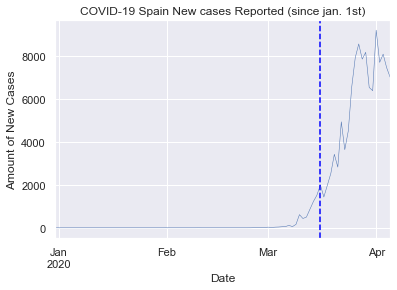

In [94]:
sns.set(rc={'figure.figsize':(6, 4)})

df_spain['new_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain New cases Reported (since jan. 1st)')
plt.xlabel('Date')
plt.ylabel('Amount of New Cases')
plt.axvline('2020-03-16', color='blue', linestyle='--')

plt.show()


### Total Cases in Spain

The charts bellow show the curves of Total Cases reported in Spain, both in linear and logarithmic scale since the beginning of the outbreak. Again, the _**red line**_ indicates the day the first measures to contain the outbreak entered into force at National level.

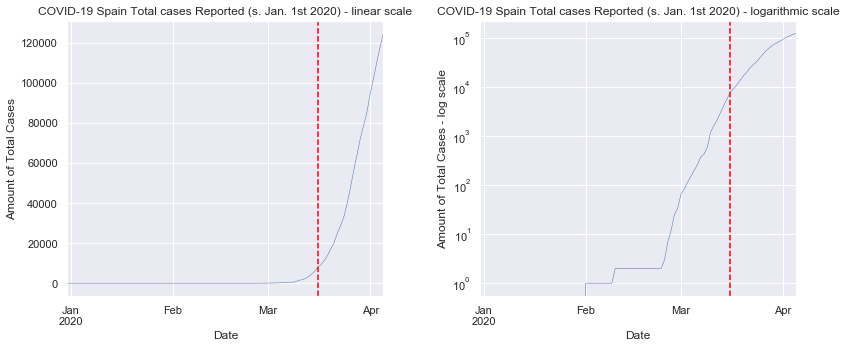

In [95]:
sns.set(rc={'figure.figsize':(12, 5)})

plt.subplot(1, 2, 1)

df_spain['total_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total cases Reported (s. Jan. 1st 2020) - linear scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Cases')
plt.axvline('2020-03-16', color='red', linestyle='--')

plt.subplot(1, 2, 2)

df_spain['total_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total cases Reported (s. Jan. 1st 2020) - logarithmic scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Cases - log scale')
plt.axvline('2020-03-16', color='red', linestyle='--')
plt.yscale('log')

plt.tight_layout()
plt.show()

### Total Deaths in Spain

The charts bellow show the curves of Total Deaths reported in Spain, both in linear and logarithmic scale since the beginning of the outbreak. Again, the _**red line**_ indicates the day the first measures to contain the outbreak entered into force at National level.

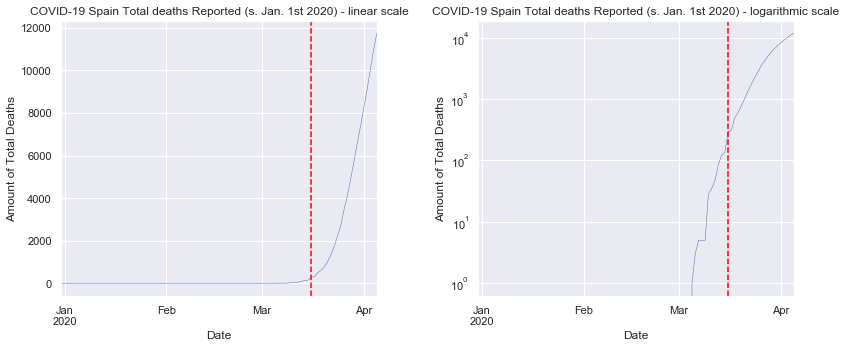

In [96]:
sns.set(rc={'figure.figsize':(12, 5)})

plt.subplot(1, 2, 1)

df_spain['total_deaths'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total deaths Reported (s. Jan. 1st 2020) - linear scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Deaths')
plt.axvline('2020-03-16', color='red', linestyle='--')

plt.subplot(1, 2, 2)

df_spain['total_deaths'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total deaths Reported (s. Jan. 1st 2020) - logarithmic scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Deaths')
plt.axvline('2020-03-16', color='red', linestyle='--')
plt.yscale('log')

plt.tight_layout()
plt.show()

## 2. World: Top-10 countries in terms of Infections and Deaths


The second part of the exercise consists in plotting the Top-10 countries in terms of Total Cases reported and Total Deaths. For that purpose, we will need to group by 'location', so that we can then sum the variables to plot in each case. As the set of data includes one observation which sums up all data under the 'location' 'World', we decided to drop that value. One variation could have been to also plot that value, for comparison purposes. 

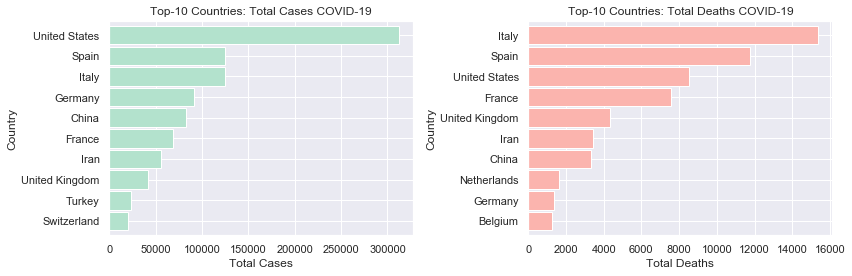

In [97]:
sns.set(rc={'figure.figsize':(12, 4)})

plt.subplot(1, 2, 1)

list_total_cases = df.groupby('location').new_cases.sum().sort_values(ascending=False)
top_total_cases = list_total_cases.drop('World')
top_ten_total_cases = top_total_cases.head(10)
top_ten_total_cases.plot(kind='barh', width=0.9, cmap='Pastel2')
plt.ylabel('Country')
plt.xlabel('Total Cases')
plt.title('Top-10 Countries: Total Cases COVID-19', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)

list_total_deaths = df.groupby('location').new_deaths.sum().sort_values(ascending=False)
top_total_deaths = list_total_deaths.drop('World')
top_ten_total_deaths = top_total_deaths.head(10)
top_ten_total_deaths.plot(kind='barh', width=0.9, cmap='Pastel1')
plt.ylabel('Country')
plt.xlabel('Total Deaths')
plt.title('Top-10 Countries: Total Deaths COVID-19', fontsize=12)
plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()

### 2.b. World: Top-10 countries Infections and Deaths per capita 


Many more variables can be taken into account in the analysis. As an example, we decided to include Population and show the data in terms of Total Cases and Total Deaths *per capita*.


For that purpose, we used an up to date population dataset published in: https://raw.githubusercontent.com/rafikahmed/worldometers/master/population_dataset.csv. 

In [98]:
## Importing data and setting the thousands delimitation to avoid importing data as string.

world_population = pd.read_csv('https://raw.githubusercontent.com/rafikahmed/worldometers/master/population_dataset.csv', thousands=',')
world_population.head()

,country_name,year,population
0,China,2019,1420062022
1,China,2018,1415045928
2,China,2017,1409517397
3,China,2016,1403500365
4,China,2015,1397028553


In [99]:
## Create a mask to filter data for the last available year, i.e. 2019.

mask_2019 = world_population['year'] == 2019
world_population_2019 = world_population[mask_2019]
world_population_2019.head()

,country_name,year,population
0,China,2019,1420062022
17,Spain,2019,46441049
34,Iraq,2019,40412299
48,Colombia,2019,49849818
55,Algeria,2019,42679018


In [100]:
## Change 'country_name' column name to 'location', as in main data frame. Drop the column 'year'.

world_population_2019_new = world_population_2019.rename(columns={'country_name': 'location'}).drop(['year'], axis = 1) 
world_population_2019_new = world_population_2019_new.set_index('location')
world_population_2019_new.head()

,population
location,
China,1420062022
Spain,46441049
Iraq,40412299
Colombia,49849818
Algeria,42679018


Once the World population data frame is ready, has the columns that we need with the appropriate format and name, we are now ready to merge it with the Total Cases and Total Deaths data. We will then add a new calculated column 'per capita'.

In [101]:
## Merging the datasets with an inner merge, in the column 'location'.
## Adding a new calculated column 'per capita'

total_deaths_pop = pd.merge(list_total_deaths, world_population_2019_new, on='location', how='inner')
total_deaths_pop['deaths_pcap'] = total_deaths_pop['new_deaths'] / total_deaths_pop['population']
total_deaths_pop.head()

,new_deaths,population,deaths_pcap
location,,,
Italy,15362,59216525,0.000259
Spain,11744,46441049,0.000253
United States,8501,329093110,0.000026
France,7560,65480710,0.000115
United Kingdom,4313,66959016,0.000064


In [102]:
total_cases_pop = pd.merge(list_total_cases, world_population_2019_new, on='location', how='inner')
total_cases_pop['cases_pcap'] = total_cases_pop['new_cases'] / total_cases_pop['population']
total_cases_pop.head()

,new_cases,population,cases_pcap
location,,,
United States,312237,329093110,0.000949
Spain,124736,46441049,0.002686
Italy,124632,59216525,0.002105
Germany,91714,82438639,0.001113
China,82575,1420062022,0.000058


#### Plotting Per Capita results

In order to compare the absolute figures with those calculated *per Capita*, we will plot it in a 4x4 grid.

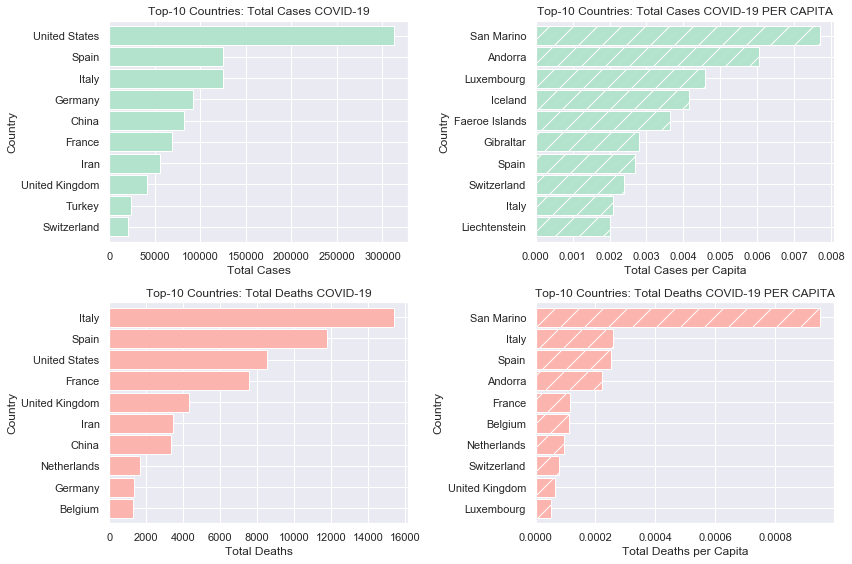

In [104]:
sns.set(rc={'figure.figsize':(12, 8)})

plt.subplot(2, 2, 1)

list_total_cases = df.groupby('location').new_cases.sum().sort_values(ascending=False)
top_total_cases = list_total_cases.drop('World')
top_ten_total_cases = top_total_cases.head(10)
top_ten_total_cases.plot(kind='barh', width=0.9, cmap='Pastel2')
plt.ylabel('Country')
plt.xlabel('Total Cases')
plt.title('Top-10 Countries: Total Cases COVID-19', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 3)

list_total_deaths = df.groupby('location').new_deaths.sum().sort_values(ascending=False)
top_total_deaths = list_total_deaths.drop('World')
top_ten_total_deaths = top_total_deaths.head(10)
top_ten_total_deaths.plot(kind='barh', width=0.9, cmap='Pastel1')
plt.ylabel('Country')
plt.xlabel('Total Deaths')
plt.title('Top-10 Countries: Total Deaths COVID-19', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)

list_total_cases_pcap = total_cases_pop['cases_pcap'].sort_values(ascending=False)
top_ten_total_cases_pcap = list_total_cases_pcap.head(10)
top_ten_total_cases_pcap.plot(kind='barh', width=0.9, cmap='Pastel2', hatch='/')
plt.ylabel('Country')
plt.xlabel('Total Cases per Capita')
plt.title('Top-10 Countries: Total Cases COVID-19 PER CAPITA', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 4)

list_total_deaths_pcap = total_deaths_pop['deaths_pcap'].sort_values(ascending=False)
top_ten_total_deaths_pcap = list_total_deaths_pcap.head(10)
top_ten_total_deaths_pcap.plot(kind='barh', width=0.9, cmap='Pastel1', hatch='/')
plt.ylabel('Country')
plt.xlabel('Total Deaths per Capita')
plt.title('Top-10 Countries: Total Deaths COVID-19 PER CAPITA', fontsize=12)
plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()